In [84]:
import matplotlib as mplot
import pandas as pd

In [14]:
try:
    import pint
except ImportError:
    !pip install pint
    import pint

In [15]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')


In [26]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(7)

# If this cell runs successfully, it produces no output.

In [32]:
bikeshare = State(olin=10, wellesley=2, babson = 0)

olin         10
wellesley     2
babson        0
Name: state, dtype: int64

In [28]:
bikeshare.olin

10

In [31]:
bikeshare.wellesley

2

In [33]:
bikeshare.babson

0

In [34]:
bikeshare.olin -= 1

In [35]:
bikeshare

olin         9
wellesley    2
babson       0
Name: state, dtype: int64

In [36]:
bikeshare.wellesley += 1
bikeshare

olin         9
wellesley    3
babson       0
Name: state, dtype: int64

In [37]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [38]:
bike_to_wellesley()
bikeshare

olin         8
wellesley    4
babson       0
Name: state, dtype: int64

In [39]:
bike_to_wellesley

<function __main__.bike_to_wellesley()>

In [41]:
def bike_to_olin():
    bikeshare.wellesley -= 1
    bikeshare.olin += 1

In [42]:
bike_to_olin()
bikeshare

olin         9
wellesley    3
babson       0
Name: state, dtype: int64

In [43]:
help(flip)

Help on function flip in module modsim:

flip(p=0.5)
    Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)



In [44]:
flip(0.7)

True

In [46]:
if flip(0.7):
    print('heads')

heads


In [47]:
if flip(0.7):
    print('heads')
else:
    print('tails')

tails


In [48]:
bikeshare = State(olin=10, wellesley=2)

olin         10
wellesley     2
Name: state, dtype: int64

In [49]:
if flip(0.5):
    bike_to_wellesley()
    print('Moving a bike to Wellesley')

bikeshare

olin         10
wellesley     2
Name: state, dtype: int64

In [50]:
if flip(0.4):
    bike_to_olin()
    print('Moving a bike to Olin')

bikeshare

olin         10
wellesley     2
Name: state, dtype: int64

In [61]:
def step():
    if flip(0.5):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(0.4):
        bike_to_olin()
        print('Moving a bike to Olin')

In [62]:
step()
bikeshare

Moving a bike to Wellesley


olin         9
wellesley    3
Name: state, dtype: int64

In [63]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')

In [64]:
step(0.5, 0.4)
bikeshare

Moving a bike to Olin


olin         10
wellesley     2
Name: state, dtype: int64

In [66]:

print(step(p1= 0.3, p2= 0.2))
bikeshare

None


olin         10
wellesley     2
Name: state, dtype: int64

In [67]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

In [68]:
bikeshare = State(olin=10, wellesley=2)

olin         10
wellesley     2
Name: state, dtype: int64

In [69]:
for i in range(4):
    bike_to_wellesley()
    
bikeshare

olin         6
wellesley    6
Name: state, dtype: int64

In [70]:
for i in range(4):
    step(0.3, 0.2)
    
bikeshare

olin         5
wellesley    7
Name: state, dtype: int64

In [71]:
for i in range(60):
    step(0.3, 0.2)

bikeshare

olin         -4
wellesley    16
Name: state, dtype: int64

In [72]:
results = TimeSeries()

Series([], Name: Quantity, dtype: float64)

In [73]:
results[0] = bikeshare.olin
results

Time
0   -4
Name: Quantity, dtype: int64

In [74]:
bikeshare = State(olin=10, wellesley=2)

olin         10
wellesley     2
Name: state, dtype: int64

In [75]:
for i in range(10):
    step(0.3, 0.2)
    results[i] = bikeshare.olin

In [76]:
results

Time
0    10
1     9
2     9
3     9
4     9
5     8
6     8
7     9
8    10
9    10
Name: Quantity, dtype: int64

In [77]:
results.mean()

9.1

In [78]:
results.describe()

count    10.000000
mean      9.100000
std       0.737865
min       8.000000
25%       9.000000
50%       9.000000
75%       9.750000
max      10.000000
Name: Quantity, dtype: float64

Saving figure to file figs/chap02-fig01.pdf


FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap02-fig01.pdf'

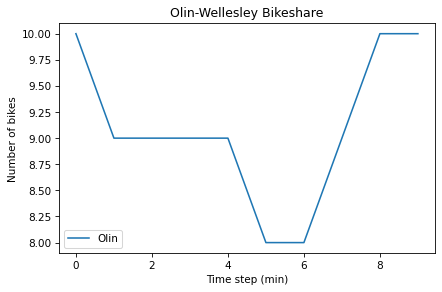

In [87]:
from matplotlib.pyplot import plot

plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

savefig('figs/chap02-fig01.pdf')

In [80]:
help(decorate)

Help on function decorate in module modsim:

decorate(**options)
    Decorate the current axes.

    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')

    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html



In [81]:
help(savefig)

Help on function savefig in module modsim:

savefig(filename, **options)
    Save the current figure.

    Keyword arguments are passed along to plt.savefig

    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html

    filename: string

